In [1]:
import re
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
newsgroups = fetch_20newsgroups('.input')
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
text = newsgroups['data'][0]
target = newsgroups['target_names'][newsgroups['target'][0]]

print('-----')
print(target)
print('-----')
print(text.strip())
print('----')

-----
rec.autos
-----
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
----


In [4]:
def to_vw_format(document, label=None):
    return str(label or '') + ' |text ' + ' '.join(re.findall('\w{3,}', document.lower())) + '\n'

to_vw_format(text, 1 if target == 'rec.autos' else -1)


'1 |text from lerxst wam umd edu where thing subject what car this nntp posting host rac3 wam umd edu organization university maryland college park lines was wondering anyone out there could enlighten this car saw the other day was door sports car looked from the late 60s early 70s was called bricklin the doors were really small addition the front bumper was separate from the rest the body this all know anyone can tellme model name engine specs years production where this car made history whatever info you have this funky looking car please mail thanks brought you your neighborhood lerxst\n'

In [5]:
all_documents = newsgroups['data']
all_targets = [1 if newsgroups['target_names'][target] == 'rec.autos' 
               else -1 for target in newsgroups['target']]

In [6]:
train_documents, test_documents, train_labels, test_labels = \
    train_test_split(all_documents, all_targets, random_state=7)


In [7]:
with open('.input/20news_train.vw', 'w') as vw_train_data:
    for text, target in zip(train_documents, train_labels):
        vw_train_data.write(to_vw_format(text, target))
with open('.input/20news_test.vw', 'w') as vw_test_data:
    for text in test_documents:
        vw_test_data.write(to_vw_format(text))

In [8]:
!!vw -d .input/20news_train.vw --loss_function hinge -f .input/20news_model.vw

['final_regressor = .input/20news_model.vw',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'using no cache',
 'Reading datafile = .input/20news_train.vw',
 'num sources = 1',
 'average  since         example        example  current  current  current',
 'loss     last          counter         weight    label  predict features',
 '1.000000 1.000000            1            1.0  -1.0000   0.0000      157',
 '0.911276 0.822551            2            2.0  -1.0000  -0.1774      159',
 '0.605793 0.300311            4            4.0  -1.0000  -0.3994       92',
 '0.419594 0.233394            8            8.0  -1.0000  -0.8167      129',
 '0.313998 0.208402           16           16.0  -1.0000  -0.6509      108',
 '0.196014 0.078029           32           32.0  -1.0000  -1.0000      115',
 '0.183158 0.170302           64           64.0  -1.0000  -0.7072      114',
 '0.261046 0.338935          128          128.0   1.0000  -0.7900      110',
 '0.262910 0.26

In [9]:
# evaluate

!!vw -i .input/20news_model.vw -t -d .input/20news_test.vw -p .input/20news_test_predictions.vw

['only testing',
 'predictions = .input/20news_test_predictions.vw',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'using no cache',
 'Reading datafile = .input/20news_test.vw',
 'num sources = 1',
 'average  since         example        example  current  current  current',
 'loss     last          counter         weight    label  predict features',
 '    n.a.     n.a.            1            1.0  unknown   1.0000      349',
 '    n.a.     n.a.            2            2.0  unknown  -1.0000       50',
 '    n.a.     n.a.            4            4.0  unknown  -1.0000      251',
 '    n.a.     n.a.            8            8.0  unknown  -1.0000      237',
 '    n.a.     n.a.           16           16.0  unknown  -0.8978      106',
 '    n.a.     n.a.           32           32.0  unknown  -1.0000      964',
 '    n.a.     n.a.           64           64.0  unknown  -1.0000      261',
 '    n.a.     n.a.          128          128.0  unknown   0.4621    

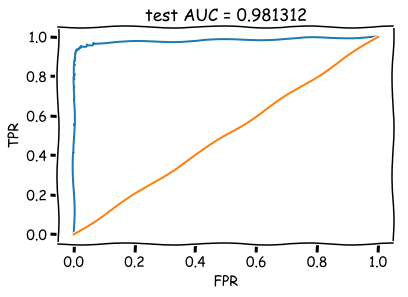

In [10]:
with open('.input/20news_test_predictions.vw') as pred_file:
    test_prediction = [float(label) 
                             for label in pred_file.readlines()]

auc = roc_auc_score(test_labels, test_prediction)
roc_curve = roc_curve(test_labels, test_prediction)

with plt.xkcd():
    plt.plot(roc_curve[0], roc_curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);
